# Bayes's Theorem

Think Bayes, Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In the previous chapter, we derived Bayes's Theorem:

$$P(A|B) = \frac{P(A) P(B|A)}{P(B)}$$

As an example, we used data from the General Social Survey and Bayes's Theorem  to compute conditional probabilities.
But since we had the complete dataset, we didn't really need Bayes's Theorem.
It was easy enough to compute the left side of the equation directly, and no easier to compute the right side.

But often we don't have a complete dataset, and in that case Bayes's Theorem is more useful.   In this chapter, we'll use it to solve several more challenging problems related to conditional probability.

## The Cookie Problem

We'll start with a thinly disguised version of an [urn problem](https://en.wikipedia.org/wiki/Urn_problem):

> Suppose there are two bowls of cookies.
>
> * Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. 
>
> * Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.
>
> Now suppose you choose one of the bowls at random and, without looking, choose a cookie at random. If the cookie is vanilla, what is the probability that it came from Bowl 1?

What we want is the conditional probability that we chose from Bowl 1 given that we got a vanilla cookie, $P(B_1 | V)$.

But what we get from the statement of the problem is:

* The conditional probability of getting a vanilla cookie, given that we chose from Bowl 1, $P(V | B_1)$ and

* The conditional probability of getting a vanilla cookie, given that we chose from Bowl 2, $P(V | B_2)$.


Bayes's Theorem tells us how they are related:

$$P(B_1|V) = \frac{P(B_1)~P(V|B_1)}{P(V)}$$

The term on the left is what we want. The terms on the right are:

-   $P(B_1)$, the probability that we chose Bowl 1,
    unconditioned by what kind of cookie we got. 
    Since the problem says we chose a bowl at random, 
    we assume $P(B_1) = 1/2$.

-   $P(V|B_1)$, the probability of getting a vanilla cookie
    from Bowl 1, which is 3/4.

-   $P(V)$, the probability of drawing a vanilla cookie from
    either bowl. 

To compute $P(V)$, we can use the law of total probability:

$$P(V) = P(B_1)~P(V|B_1) ~+~ P(B_2)~P(V|B_2)$$

Plugging in the numbers from the statement of the problem, we have

$$P(V) = (1/2)~(3/4) ~+~ (1/2)~(1/2) = 5/8$$

We can also compute this result directly, like this: 

* Since we had an equal chance of choosing either bowl and the bowls contain the same number of cookies, we had the same chance of choosing any cookie. 

* Between the two bowls there are 50 vanilla and 30 chocolate cookies, so $P(V) = 5/8$.

Finally, we can apply Bayes's Theorem to compute the posterior probability of Bowl 1:

$$P(B_1|V) = (1/2)~(3/4)~/~(5/8) = 3/5$$

This example demonstrates one use of Bayes's theorem: it provides a
way to get from $P(B|A)$ to $P(A|B)$. 
This strategy is useful in cases like this where it is easier to compute the terms on the right side than the term on the left.

## Diachronic Bayes

There is another way to think of Bayes's theorem: it gives us a way to
update the probability of a hypothesis, $H$, given some body of data, $D$.

This interpretation is "diachronic", which means "related to change over time"; in this case, the probability of the hypotheses changes as we see new data.

Rewriting Bayes's theorem with $H$ and $D$ yields:

$$P(H|D) = \frac{P(H)~P(D|H)}{P(D)}$$

In this interpretation, each term has a name:

-  $P(H)$ is the probability of the hypothesis before we see the data, called the prior probability, or just **prior**.

-  $P(H|D)$ is the probability of the hypothesis after we see the data, called the **posterior**.

-  $P(D|H)$ is the probability of the data under the hypothesis, called the **likelihood**.

-  $P(D)$ is the **total probability of the data**, under any hypothesis.

Sometimes we can compute the prior based on background information. For example, the cookie problem specifies that we choose a bowl at random with equal probability.

In other cases the prior is subjective; that is, reasonable people might disagree, either because they use different background information or because they interpret the same information differently.

The likelihood is usually the easiest part to compute. In the cookie
problem, we are given the number of cookies in each bowl, so we can compute the probability of the data under each hypothesis.

Computing the total probability of the data can be tricky. 
It is supposed to be the probability of seeing the data under any hypothesis at all, but it can be hard to nail down what that means.

Most often we simplify things by specifying a set of hypotheses that
are:

* Mutually exclusive, which means that only one of them can be true, and

* Collectively exhaustive, which means one of them must be true.

When these conditions apply, we can compute $P(D)$ using the law of total probability.  For example, with two hypotheses, $H_1$ and $H_2$:

$$P(D) = P(H_1)~P(D|H_1) + P(H_2)~P(D|H_2)$$

And more generally, with any number of hypotheses:

$$P(D) = \sum_i P(H_i)~P(D|H_i)$$

The process in this section, using data and a prior probability to compute a posterior probability, is called a **Bayesian update**.

## Bayes Tables

A convenient tool for doing a Bayesian update is a Bayes table.
You can write a Bayes table on paper or use a spreadsheet, but in this section I'll use a Pandas `DataFrame`.

First I'll make empty `DataFrame` with one row for each hypothesis:

In [1]:
import pandas as pd

table = pd.DataFrame(index=['Bowl 1', 'Bowl 2'])

Now I'll add a column to represent the priors:

In [2]:
table['prior'] = 1/2, 1/2
table

,prior
Bowl 1,0.5
Bowl 2,0.5


And a column for the likelihoods:

In [3]:
table['likelihood'] = 3/4, 1/2
table

,prior,likelihood
Bowl 1,0.5,0.75
Bowl 2,0.5,0.50


Here we see a difference from the previous method: we compute likelihoods for both hypotheses, not just Bowl 1 (AZ: in previous solution we computed only a probability of the 1st bowl):

* The chance of getting a vanilla cookie from Bowl 1 is 3/4.

* The chance of getting a vanilla cookie from Bowl 2 is 1/2.

You might notice that the likelihoods don't add up to 1.  That's OK; each of them is a probability conditioned on a different hypothesis.
There's no reason they should add up to 1 and no problem if they don't.

The next step is similar to what we did with Bayes's Theorem; we multiply the priors by the likelihoods:

In [4]:
table['unnorm'] = table['prior'] * table['likelihood']
table

,prior,likelihood,unnorm
Bowl 1,0.5,0.75,0.375
Bowl 2,0.5,0.50,0.250


I call the result `unnorm` because these values are the "unnormalized posteriors".  Each of them is the product of a prior and a likelihood:

$$P(B_i)~P(D|B_i)$$

which is the numerator of Bayes's Theorem. 
If we add them up, we have

$$P(B_1)~P(D|B_1) + P(B_2)~P(D|B_2)$$

which is the denominator of Bayes's Theorem, $P(D)$.

So we can compute the total probability of the data like this:

In [5]:
prob_data = table['unnorm'].sum()
prob_data

0.625

Notice that we get 5/8, which is what we got by computing $P(D)$ directly.

And we can compute the posterior probabilities like this:

In [7]:
table['posterior'] = table['unnorm'] / prob_data
table

,prior,likelihood,unnorm,posterior
Bowl 1,0.5,0.75,0.375,0.6
Bowl 2,0.5,0.50,0.250,0.4


The posterior probability for Bowl 1 is 0.6, which is what we got using Bayes's Theorem explicitly.
As a bonus, we also get the posterior probability of Bowl 2, which is 0.4.

When we add up the unnormalized posteriors and divide through, we force the posteriors to add up to 1.  This process is called "normalization", which is why the total probability of the data is also called the "normalizing constant".

## The Dice Problem

A Bayes table can also solve problems with more than two hypotheses.  For example:

> Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose one of the dice at random, roll it, and report that the outcome is a 1. What is the probability that I chose the 6-sided die?

In this example, there are three hypotheses with equal prior
probabilities. The data is my report that the outcome is a 1. 

If I chose the 6-sided die, the probability of the data is
1/6. If I chose the 8-sided die, the probability is 1/8, and if I chose the 12-sided die, it's 1/12.

Here's a Bayes table that uses integers to represent the hypotheses:

In [8]:
table2 = pd.DataFrame(index=[6, 8, 12])

I'll use fractions to represent the prior probabilities and the likelihoods.  That way they don't get rounded off to floating-point numbers.

In [9]:
from fractions import Fraction

table2['prior'] = Fraction(1, 3)
table2['likelihood'] = Fraction(1, 6), Fraction(1, 8), Fraction(1, 12)
table2

,prior,likelihood
6,1/3,1/6
8,1/3,1/8
12,1/3,1/12


Once you have priors and likelhoods, the remaining steps are always the same, so I'll put them in a function:

In [1]:
def update(table):
    """Compute the posterior probabilities."""
    table['unnorm'] = table['prior'] * table['likelihood']
    prob_data = table['unnorm'].sum()
    table['posterior'] = table['unnorm'] / prob_data
    return prob_data

And call it like this.

In [11]:
prob_data = update(table2)

Here is the final Bayes table:

In [12]:
table2

,prior,likelihood,unnorm,posterior
6,1/3,1/6,1/18,4/9
8,1/3,1/8,1/24,1/3
12,1/3,1/12,1/36,2/9


The posterior probability of the 6-sided die is 4/9, which is a little more than the probabilities for the other dice, 3/9 and 2/9.
Intuitively, the 6-sided die is the most likely because it had the highest likelihood of producing the outcome we saw.

## The Monty Hall Problem

Next we'll use a Bayes table to solve one of the most contentious problems in probability.

The Monty Hall problem is based on a game show called *Let's Make a Deal*. If you are a contestant on the show, here's how the game works:

* The host, Monty Hall, shows you three closed doors -- numbered 1, 2, and 3 -- and tells you that there is a prize behind each door.

* One prize is valuable (traditionally a car), the other two are less valuable (traditionally goats).

* The object of the game is to guess which door has the car. If you guess right, you get to keep the car.

Suppose you pick Door 1. Before opening the door you chose, Monty opens Door 3 and reveals a goat. Then Monty offers you the option to stick with your original choice or switch to the remaining unopened door.

In [13]:
# AZ: let's use the approach from the previous problem

table = pd.DataFrame(index=['door1', 'door2', 'door3'])
table

""
door1
door2
door3


To maximize your chance of winning the car, should you stick with Door 1 or switch to Door 2?

To answer this question, we have to make some assumptions about the behavior of the host:

1.  Monty always opens a door and offers you the option to switch.

2.  He never opens the door you picked or the door with the car.

3.  If you choose the door with the car, he chooses one of the other
    doors at random.

Under these assumptions, you are better off switching. 
If you stick, you win $1/3$ of the time. If you switch, you win $2/3$ of the time.

If you have not encountered this problem before, you might find that
answer surprising. You would not be alone; many people have the strong
intuition that it doesn't matter if you stick or switch. There are two
doors left, they reason, so the chance that the car is behind Door A is 50%. But that is wrong.

To see why, it can help to use a Bayes table. We start with three
hypotheses: the car might be behind Door 1, 2, or 3. According to the
statement of the problem, the prior probability for each door is 1/3.

In [23]:
table3 = pd.DataFrame(index=['Door 1', 'Door 2', 'Door 3'])
table3['prior'] = Fraction(1, 3)
table3

,prior
Door 1,1/3
Door 2,1/3
Door 3,1/3


The data is that `Monty opened Door 3 and revealed a goat`. So let's
consider the probability of the data under each hypothesis:

* If the car is behind Door 1, Monty chooses Door 2 or 3 at random, so the probability he opens Door 3 is $1/2$.

* If the car is behind Door 2, Monty has to open Door 3, so the probability of the data under this hypothesis is 1.

* If the car is behind Door 3, Monty does not open it, so the probability of the data under this hypothesis is 0.

Here are the likelihoods. 

In [24]:
table3['likelihood'] = Fraction(1, 2), 1, 0
table3

,prior,likelihood
Door 1,1/3,1/2
Door 2,1/3,1
Door 3,1/3,0


Now that we have priors and likelihoods, we can use `update` to compute the posterior probabilities.

In [25]:
update(table3)
table3

,prior,likelihood,unnorm,posterior
Door 1,1/3,1/2,1/6,1/3
Door 2,1/3,1,1/3,2/3
Door 3,1/3,0,0,0


After Monty opens Door 3, the posterior probability of Door 1 is $1/3$;
the posterior probability of Door 2 is $2/3$.
So you are better off switching from Door 1 to Door 2.

As this example shows, our intuition for probability is not always
reliable. 
Bayes's Theorem can help by providing a divide-and-conquer strategy:

1.  First, write down the hypotheses and the data.

2.  Next, figure out the prior probabilities.

3.  Finally, compute the likelihood of the data under each hypothesis.

The Bayes table does the rest.

## Summary

In this chapter we solved the Cookie Problem using Bayes's theorem explicitly and using a Bayes table.
There's no real difference between these methods, but the Bayes table can make it easier to compute the total probability of the data, especially for problems with more than two hypotheses.

Then we solved the Dice Problem, which we will see again in the next chapter, and the Monty Hall problem, which you might hope you never see again.

If the Monty Hall problem makes your head hurt, you are not alone.  But I think it demonstrates the power of Bayes's Theorem as a divide-and-conquer strategy for solving tricky problems.  And I hope it provides some insight into *why* the answer is what it is.

When Monty opens a door, he provides information we can use to update our belief about the location of the car.  Part of the information is obvious.  If he opens Door 3, we know the car is not behind Door 3.  But part of the information is more subtle.  Opening Door 3 is more likely if the car is behind Door 2, and less likely if it is behind Door 1.  So the data is evidence in favor of Door 2.  We will come back to this notion of evidence in future chapters.

In the next chapter we'll extend the Cookie Problem and the Dice Problem, and take the next step from basic probability to Bayesian statistics.

But first, you might want to work on the exercises.

## Exercises

**Exercise:** Suppose you have two coins in a box.
One is a normal coin with heads on one side and tails on the other, and one is a trick coin with heads on both sides.  You choose a coin at random and see that one of the sides is heads.
What is the probability that you chose the trick coin?

In [19]:
# Solution goes here
table_heads = pd.DataFrame(index=['Coin 1', 'Coin 2'])

table_heads['prior'] = Fraction(1, 2)
table_heads['likelihood'] = Fraction(1, 2), 1
display(table_heads)
update(table_heads)
table_heads

,prior,likelihood
Coin 1,1/2,1/2
Coin 2,1/2,1


,prior,likelihood,unnorm,posterior
Coin 1,1/2,1/2,1/4,1/3
Coin 2,1/2,1,1/2,2/3


**Exercise:** Suppose you meet someone and learn that they have two children.
You ask if either child is a girl and they say yes.
What is the probability that both children are girls?

Hint: Start with four equally likely hypotheses.

In [21]:
# Solution goes here
table_kids = pd.DataFrame(['gg', 'gb', 'bg', 'bb'])
table_kids['prior'] = Fraction(1, 4)
table_kids['likelihood'] = 1, Fraction(1, 2), Fraction(1, 2), 0
update(table_kids)
display(table_kids)

,0,prior,likelihood,unnorm,posterior
0,gg,1/4,1,1/4,1/2
1,gb,1/4,1/2,1/8,1/4
2,bg,1/4,1/2,1/8,1/4
3,bb,1/4,0,0,0


**Exercise:** There are many variations of the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem).  
For example, suppose Monty always chooses Door 2 if he can, and
only chooses Door 3 if he has to (because the car is behind Door 2).

If you choose Door 1 and Monty opens Door 2, what is the probability the car is behind Door 3?

If you choose Door 1 and Monty opens Door 3, what is the probability the car is behind Door 2?

In [27]:
# Solution goes here
table_pref2_open2 = pd.DataFrame(index=['Door 1', 'Door 2', 'Door 3'])
table_pref2_open2['prior'] = Fraction(1, 3)
table_pref2_open2['likelihood'] = 0, 0, 1
update(table_pref2_open2)
display(table_pref2_open2)

,prior,likelihood,unnorm,posterior
Door 1,1/3,0,0,0
Door 2,1/3,0,0,0
Door 3,1/3,1,1/3,1


In [28]:
# Solution goes here
table_pref2_open3 = pd.DataFrame(index=['Door 1', 'Door 2', 'Door 3'])
table_pref2_open3['prior'] = Fraction(1, 3)
# data here is Monty opens Door 3
# likelihoods:
# car behind Door 1: likelihood = 0
# car behind Door 2: likelihood = 1
# car behind Door 3: likelihood = 0
table_pref2_open3['likelihood'] = 0, 1, 0
update(table_pref2_open3)
display(table_pref2_open3)

,prior,likelihood,unnorm,posterior
Door 1,1/3,0,0,0
Door 2,1/3,1,1/3,1
Door 3,1/3,0,0,0


**Exercise:** M&M's are small candy-coated chocolates that come in a variety of colors.  
Mars, Inc., which makes M&M's, changes the mixture of colors from time to time.
In 1995, they introduced blue M&M's.  

* In 1994, the color mix in a bag of plain M&M's was 30\% Brown, 20\% Yellow, 20\% Red, 10\% Green, 10\% Orange, 10\% Tan.  

* In 1996, it was 24\% Blue , 20\% Green, 16\% Orange, 14\% Yellow, 13\% Red, 13\% Brown.

Suppose a friend of mine has two bags of M&M's, and he tells me
that one is from 1994 and one from 1996.  He won't tell me which is
which, but he gives me one M&M from each bag.  One is yellow and
one is green.  What is the probability that the yellow one came
from the 1994 bag?

Hint: The trick to this question is to define the hypotheses and the data carefully.

In [5]:
# Solution goes here

# data
# yellow from one bag, green from another

# hypotheses and data
# h1 = yellow1994 & green1996
# h2 = yellow1996 & green1994

import pandas as pd
from fractions import Fraction

table_mm = pd.DataFrame(index=['h1', 'h2'])
table_mm['prior'] = Fraction(1, 2), Fraction(1, 2)
table_mm['likelihood'] = 0.2 * 0.2, 0.1 * 0.14
update(table_mm)

table_mm

,prior,likelihood,unnorm,posterior
h1,1/2,0.040,0.02,0.740741
h2,1/2,0.014,0.007,0.259259


# Simplified M&M problem

In [6]:
import pandas as pd
from fractions import Fraction

def update(table):
    """Compute the posterior probabilities."""
    table['unnorm'] = table['prior'] * table['likelihood']
    prob_data = table['unnorm'].sum()
    table['posterior'] = table['unnorm'] / prob_data
    return prob_data

In [7]:
""" Simplify M&M problem

1994        1996
----        ----
Yellow 9    Yellow 1
Green 1     Green 9
"""

# data
# yellow from one bag, green from another

# hypotheses and data
# h1 = yellow1994 & green1996
# h2 = yellow1996 & green1994

table_mm = pd.DataFrame(index=['h1', 'h2'])
table_mm['prior'] = Fraction(1, 2), Fraction(1, 2)
table_mm['likelihood'] = Fraction(9, 10) * Fraction(9, 10), Fraction(1, 10) * Fraction(1, 10)
update(table_mm)

table_mm

,prior,likelihood,unnorm,posterior
h1,1/2,81/100,81/200,81/82
h2,1/2,1/100,1/200,1/82


In [16]:
""" Simplify M&M problem

1994        1996
----        ----
Yellow 9    Yellow 2
Green 1     Green 8
"""

# data
# yellow from one bag, green from another

# hypotheses and data
# h1 = yellow1994 & green1996
# h2 = yellow1996 & green1994

table_mm = pd.DataFrame(index=['h1', 'h2'])
table_mm['prior'] = Fraction(1, 2), Fraction(1, 2)
table_mm['likelihood'] = Fraction(9, 10) * Fraction(8, 10), Fraction(1, 10) * Fraction(2, 10)
update(table_mm)

display(table_mm)

print(f'posterior (floating point):\n{table_mm["posterior"].astype(float)}')

,prior,likelihood,unnorm,posterior
h1,1/2,18/25,9/25,36/37
h2,1/2,1/50,1/100,1/37


posterior (floating point):
h1    0.972973
h2    0.027027
Name: posterior, dtype: float64


In [11]:
# Check the result by direct simulation

import random

def draw_candy():
    """
    Draw two M&M of different color (repeat if the color the same)
    Returns pair (color of M&M bag1994, color of M&M from 1996)
    """
    # 0 is yellow, 1 is green
    bag1994 = 9*[0] + 1*[1]
    bag1996 = 2*[0] + 8*[1]

    color1994, color1996 = 0, 0

    while color1994 == color1996:
        color1994 = random.choice(bag1994)
        color1996 = random.choice(bag1996)

    return color1994, color1996

random.seed(1)

Npairs = 1000
yellow1994, yellow1996 = 0, 0

for i in range(Npairs):
    color1994, color1996 = draw_candy()
    if color1994 == 0:
        yellow1994 += 1
    else:
        yellow1996 += 1

prob_yellow1994 = yellow1994 / Npairs
prob_yellow1996 = yellow1996 / Npairs

print(f'prob_yellow1994: {prob_yellow1994}, prob_yellow1996: {prob_yellow1996}')

prob_yellow1994: 0.973, prob_yellow1996: 0.027


# AZ: Simulate the Monty problem (classical)

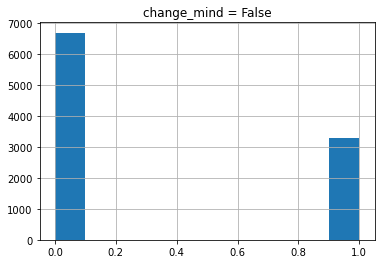

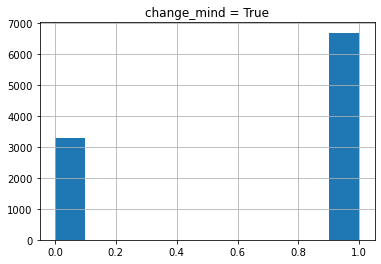

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def monty(change_mind=False):
    # the player always selects Door 1

    # place car
    door_car = np.random.choice(3)

    # door with goat to be opened: Door 2 or Door 3 with goat

    doors_select = [1, 2]

    if door_car == 0:
        door_close = np.random.choice(doors_select)
    else:
        door_close = door_car

    if change_mind:
        return door_car == door_close
    else:
        return door_car == 0


change_mind = False
doors = [int(monty(change_mind=change_mind)) for i in range(10000)]

plt.figure()
plt.title(f'change_mind = {change_mind}')
plt.hist(doors)
plt.grid()

change_mind = True
doors = [int(monty(change_mind=change_mind)) for i in range(10000)]

plt.figure()
plt.title(f'change_mind = {change_mind}')
plt.hist(doors)
plt.grid()
    




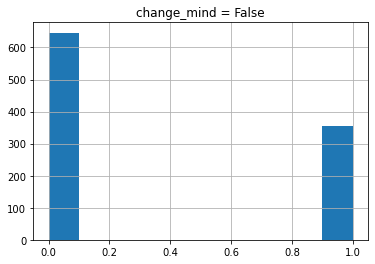

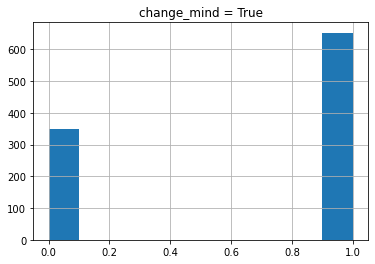

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def monty(change_mind=False):
    # the player always selects Door 1

    # place car
    door_car = np.random.choice(3)

    # door with the car to be closed: Door 2 or Door 3

    if door_car == 0:
        door_close = np.random.choice([1, 2])
    else:
        door_close = door_car

    if change_mind:
        return door_car == door_close
    else:
        return door_car == 0


change_mind = False
doors = [int(monty(change_mind=change_mind)) for i in range(1000)]

plt.figure()
plt.title(f'change_mind = {change_mind}')
plt.hist(doors)
plt.grid()

change_mind = True
doors = [int(monty(change_mind=change_mind)) for i in range(1000)]

plt.figure()
plt.title(f'change_mind = {change_mind}')
plt.hist(doors)
plt.grid()